# Homework 2

## Question 2

### a.Implement the algorithm

### Steepest descent direction with back tracking step length:

Choose $\hat{\alpha} = 1$, $\rho = 0.8$, $c = 0.5$;  
Start with $k = 0$, set $\alpha \leftarrow  \hat{\alpha}$;  
**Repeat** until $f(x_k + \alpha p_k) \leq f(x_k) + c \alpha \nabla f_{k}^{T} p_k$  
&emsp; $\alpha \leftarrow \rho \alpha$  
**end(repeat)**  
Terminate with $\alpha_k = \alpha$.  
Where $\nabla f_k = (2x_1,2cx_2)^T, p_k = -\nabla f_k$.  
Set $x_{k+1} = x_k + \alpha_k p_k$  
Continue the iterations.


### b. calculate the yardstick by theorem 3.3 in NW

The hessian $Q$ of $f$ is 
$Q = \begin{pmatrix}
2 & 0\\
0 & 2c\\
\end{pmatrix}$, so $Q$ is symmetric and postivie definited with all postive eigenvalues. $f$ can be written as 
$$
f(x) = \frac{1}{2}x^T Q x
$$
By theorem 3.3 in NW, the convergence rate of $x_k$ calculated with exact line search by steepest descent method is bounded by 
$$
\frac{\lambda_n - \lambda_1}{\lambda_n + \lambda_1}
$$
where $\lambda_n, \lambda_1$ are the largest and smallest eigenvalues of $Q$ respectively.
Thus, the yardstick of this question is
$$
\frac{2c-2}{2c+2} = \frac{c-1}{c+1}
$$


### c. Propose one method to tract the convergence rate


Recall in HW1, we proof the question below:

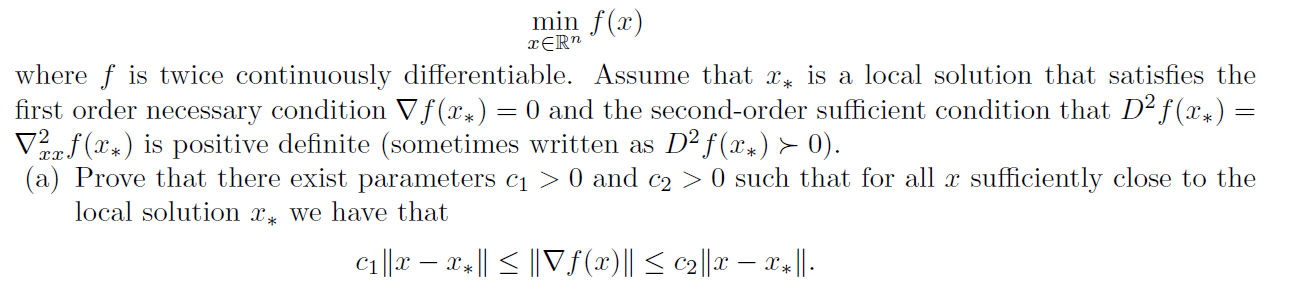

From this assumption, in question 2(e) of Homework1, we propose one idea to tract the convergence rate, which is to calculate the convergence rate of the gradient $\nabla f_k \to 0$. We hope to obtain the linear convergence rate of the gradient sequence, so we can guarantee $x_k$ converges to the minimal solutioln with the linear convergence rate. The reason to expect linear convergence rate because the exact line search only has linear convergence rate, so our inexact line search should be slower than it.

### d.Propose the stopping criteria on codes of algorithm


The algorith will stop when:  
1. the stopping criteria was triggered ($|\nabla f_k| < 1e-8$)
2. The iterations reach 1000 times


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def norm(x):
    return np.linalg.norm(x)

def f(x,c):
    x_1 = x[0]
    x_2 = x[1]
    return x_1**2 + c*x_2**2

def gradient(x,c):
    x_1 = x[0]
    x_2 = x[1]
    return np.array([2*x_1, 2*c*x_2])


def step_length(x,p,c):
    alpha = 1
    rho = 0.8
    c_1 = 0.6
    while(f(x + alpha*p,c) > (f(x,c) + c_1*alpha*np.dot(gradient(x,c),p))):
        alpha = rho*alpha
    return alpha



def hw_p2(x_0,c):
    """
    Start at x_0 and given c to decide f(x), this function will return the point with minimal solution
    """

    
    error = np.zeros(30)
    if(c > 500):
        error = np.zeros(300)
    error[0] = norm(x_0)
    yardstick = 10**(-8)
    x = x_0
    x_pre = np.copy(x)
    k = 0
    while(k < 1000 and norm(gradient(x,c)) > yardstick):
        p = (-1)*gradient(x,c)
        alpha = step_length(x,p,c)
        x_pre = np.copy(x)
        x = x + alpha*p
        k = k + 1
        error[k] = norm(x)
    print(gradient(x,c))
    print(gradient(x_pre,c))
    ratio = norm(gradient(x,c))/norm(gradient(x_pre,c))
    return f(x,c),ratio,error
    




### e. fix c = 0. Choose started points at (1,1),(-1,1),(-1,-1),(1,-1)


[ 5.36724125e-09 -2.99602999e-09]
[1.12825433e-08 5.22991494e-09]
[-5.36724125e-09 -2.99602999e-09]
[-1.12825433e-08  5.22991494e-09]
[-5.36724125e-09  2.99602999e-09]
[-1.12825433e-08 -5.22991494e-09]
[5.36724125e-09 2.99602999e-09]
[ 1.12825433e-08 -5.22991494e-09]


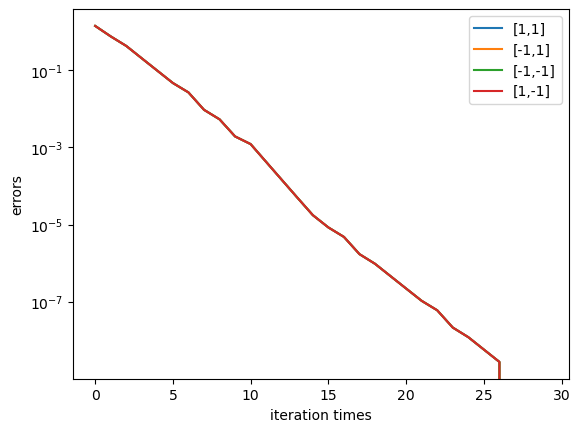

In [2]:
A = np.array([1,1])
B = np.array([-1,1])
C = np.array([-1,-1])
D = np.array([1,-1])

a,converge_A,error_A = hw_p2(A,3)
b,converge_B,error_B = hw_p2(B,3)
c,converge_C,error_C = hw_p2(C,3)
d,converge_D,error_D = hw_p2(D,3)

x_axis = np.arange(30)

plt.semilogy(x_axis,error_A,label='[1,1]')
plt.semilogy(x_axis,error_B,label='[-1,1]')
plt.semilogy(x_axis,error_C,label='[-1,-1]')
plt.semilogy(x_axis,error_D,label='[1,-1]')
plt.xlabel('iteration times')
plt.ylabel('errors')
plt.legend()

The expected convergence rate when $c = 3$ is $\frac{3-1}{3+1} = 0.5$.

In [3]:
print(f'Convergence rates calculated by the algorithm for four points are {converge_A},{converge_B},{converge_C},{converge_D}')

Convergence rates calculated by the algorithm for four points are 0.49428687706321334,0.49428687706321334,0.49428687706321334,0.49428687706321334


### f. repeat e at c = 1000

[ 4.82285622e-09 -2.69855186e-09]
[ 4.82677216e-09 -1.43004778e-08]
[-4.82285622e-09 -2.69855186e-09]
[-4.82677216e-09 -1.43004778e-08]
[-4.82285622e-09  2.69855186e-09]
[-4.82677216e-09  1.43004778e-08]
[4.82285622e-09 2.69855186e-09]
[4.82677216e-09 1.43004778e-08]


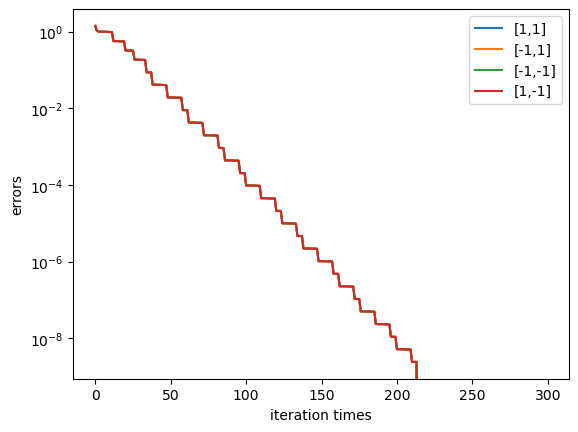

In [4]:
A = np.array([1,1])
B = np.array([-1,1])
C = np.array([-1,-1])
D = np.array([1,-1])

a,converge_A,error_A = hw_p2(A,1000)
b,converge_B,error_B = hw_p2(B,1000)
c,converge_C,error_C = hw_p2(C,1000)
d,converge_D,error_D = hw_p2(D,1000)

x_axis = np.arange(300)

plt.semilogy(x_axis,error_A,label='[1,1]')
plt.semilogy(x_axis,error_B,label='[-1,1]')
plt.semilogy(x_axis,error_C,label='[-1,-1]')
plt.semilogy(x_axis,error_D,label='[1,-1]')
plt.xlabel('iteration times')
plt.ylabel('errors')
plt.legend()

The expected convergence rate when $c = 1000$ is $\frac{999}{1001} = 0.998$.

In [5]:
print(f'Convergence rates calculated by the algorithm for four points are {converge_A},{converge_B},{converge_C},{converge_D}')

Convergence rates calculated by the algorithm for four points are 0.3661604484064462,0.3661604484064462,0.3661604484064462,0.3661604484064462


## Problem 3

### a.Implement Newton's method without line search

In [6]:
# The template looks like this:
def derivatives(f,x):
    f_x = 0
    g = 0
    h = 0
    return f_x,g,h

def newton(f,x_0,k):
    x = x_0
    n = 0
    while(n <= k):
        f_x,g,h = derivatives(f,x)
        x = x + np.linalg.solve(-h,g)
        n = n + 1
    
    return x


### b. 

In [62]:
from sympy import *

# define the Gradient and Hessian matrix
x, y = symbols('x y')
f = symbols('f', cls=Function)
f = (1/2)*(12+x**2+((1+y**2)/x**2)+(((x*y)**2 + 100)/(x*y)**4))

G = Matrix([f]).jacobian(Matrix(list(f.free_symbols)))
H = hessian(f, [x, y])


In [71]:


def derivatives(f,X):
    x_1 = X[0]
    x_2 = X[1]
    f_x = f.subs([(x,x_1), (y,x_2)])
    g = G.subs(x,x_1).subs(y,x_2)
    h = H.subs(x,x_1).subs(y,x_2)

    return f_x,np.array(g).astype(np.float64),np.array(h).astype(np.float64)

def hw2_p3(x_0,k):
    X = x_0
    n = 0
    y_list = np.zeros(k)
    while(n < k):
        f_x,g,h = derivatives(f,X)
        y_list[n] = f_x
        tmp = g[0][0]
        g[0][0] = g[0][1]
        g[0][1] = tmp
        X = X + np.linalg.solve((-1)*h,g.T).flatten('F')
        n = n + 1
    return X,y_list

start = np.array([3,2])
X,y_list = hw2_p3(start,20)



Text(0.5, 1.0, 'start point at (3,2)')

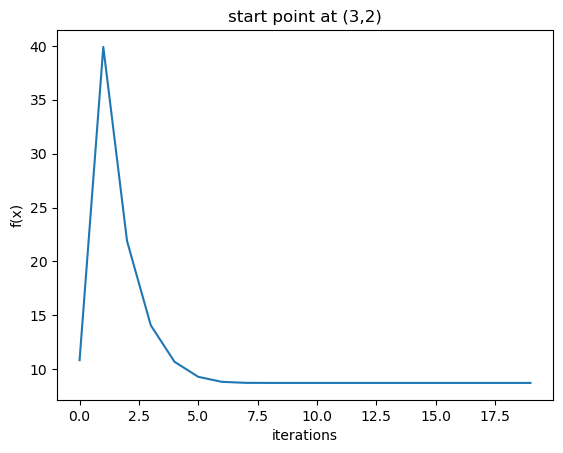

In [72]:
import matplotlib.pyplot as plt

x_list = np.arange(20)

plt.plot(x_list,y_list)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title('start point at (3,2)')

The observation is that this method actually converges only after 10 iterations.

### c. Start at (3,4)

Text(0.5, 1.0, 'start point at (3,4)')

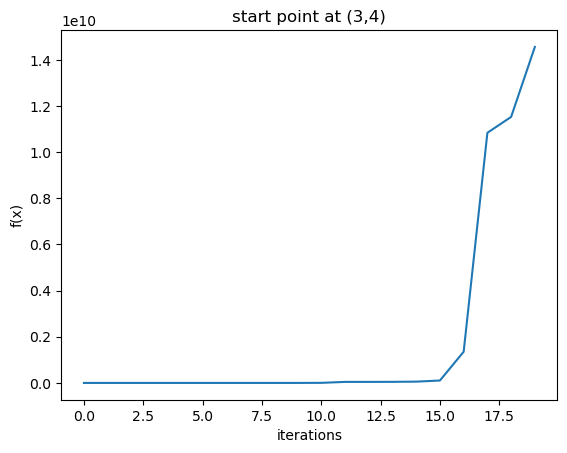

In [73]:
start = np.array([3,4])
X,y_list = hw2_p3(start,20)

x_list = np.arange(20)

plt.figure()
plt.plot(x_list,y_list)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title('start point at (3,4)')

The algorihtm diverges at this point.

### d. Try to compute the convergence rate at point (3,2) numerically.

The idea is to find the iteration when $f(x)$ becomes cauchy, such as $ |f(x_k) - f(x_{k-1})| < 10^{-8}$. For such $k$, calculate the $\frac{|x_{k-1} - x_{k}|}{|x_{k-2} - x_{k}|^2}$. I regard this value can tell us the numerical convegence rate.

In [89]:
def hw2_p3_problem_d(x_0,k):
    X = x_0
    n = 0
    y_list = np.zeros(k)
    norm_list = [None] * 20
    yardstick = 10**(-8)
    key_iteration = 0
    while(n < k):
        f_x,g,h = derivatives(f,X)
        y_list[n] = f_x
        norm_list[n] = X
        tmp = g[0][0]
        g[0][0] = g[0][1]
        g[0][1] = tmp
        X = X + np.linalg.solve((-1)*h,g.T).flatten('F')
        if(np.linalg.norm(y_list[n] - y_list[n-1]) < yardstick):
            key_iteration = n
            break
        n = n + 1
    return X,norm_list,key_iteration

start = np.array([3,2])
X,norm_list,key = hw2_p3_problem_d(start,20)
converge_rate = (np.linalg.norm(norm_list[key] - norm_list[key-1])/(np.linalg.norm(norm_list[key] - np.linalg.norm(norm_list[key-2]))**2))
print(converge_rate)

6.877785058277364e-05


So the sequence converges quadratically.